<a href="https://colab.research.google.com/github/KinuthiaJ/FINANACIAL-INCLUSION/blob/main/Copy_of_Hypothesis_Testing_Jane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Null hypothesis**: More Bluecars are taken over the weekend than over the weekday.

**Alternative hypothesis**: More Bluecars are taken over the weekday than over the weekend


We would like to understand the usage of electric blue cars based on the day of the week and the area code. We would like to investigate the claim that more blue cars are taken over the weekday as compared to the weekend. 

The data to be analysed was collected by the Autolib electric car-sharing service company in their day-to-day operations

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [ ]:
# Loading the dataset
cars_df = pd.read_csv(r'autolib_daily_events_postal_code.csv')
cars_df.drop(['date'],axis=1)

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,1440,0,weekday,11,14,3,5,2,2,0,0


The dataset has 16,085 rows and 12 columns

In [ ]:
# Checking the data types of the variables
cars_df.dtypes


Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# Summary statistics of the data
cars_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


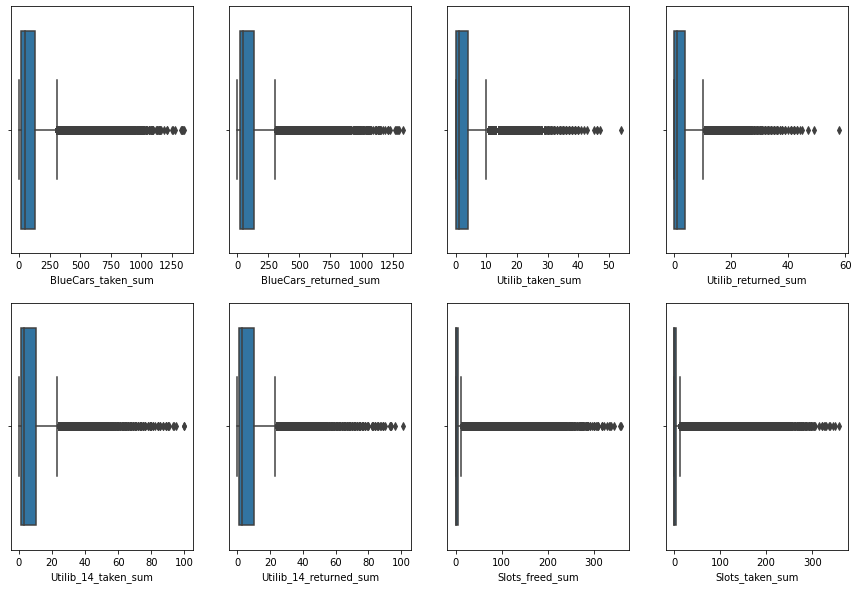

In [ ]:
# Checking for outliers in the numerical variables
numeric_cols = ["BlueCars_taken_sum","BlueCars_returned_sum", "Utilib_taken_sum","Utilib_returned_sum","Utilib_14_taken_sum","Utilib_14_returned_sum","Slots_freed_sum","Slots_taken_sum"]
fig,axes = plt.subplots(nrows=2, ncols=4,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),cars_df,numeric_cols):
  sns.boxplot(cars_df[column],ax=ax)

In [ ]:
# Dealing with the outliers
# Replacing the outliers with the mean
outlierfilter1 = cars_df["BlueCars_taken_sum"]>250
cars_df.loc[outlierfilter1,"BlueCars_taken_sum"] = 126
outlierfilter2 = cars_df["BlueCars_returned_sum"]>250
cars_df.loc[outlierfilter2,"BlueCars_returned_sum"] = 126
outlierfilter1 = cars_df["Utilib_taken_sum"]>10
cars_df.loc[outlierfilter1,"Utilib_taken_sum"] = 7
outlierfilter2 = cars_df["Utilib_returned_sum"]>10
cars_df.loc[outlierfilter2,"Utilib_returned_sum"] = 7
outlierfilter1 = cars_df["Utilib_14_taken_sum"]>20
cars_df.loc[outlierfilter1,"Utilib_14_taken_sum"] = 9
outlierfilter2 = cars_df["Utilib_14_returned_sum"]>20
cars_df.loc[outlierfilter2,"Utilib_14_returned_sum"] = 9
outlierfilter1 = cars_df["Slots_freed_sum"]>5
cars_df.loc[outlierfilter1,"Slots_freed_sum"] = 5
outlierfilter2 = cars_df["Slots_taken_sum"]>5
cars_df.loc[outlierfilter2,"Slots_taken_sum"] = 5

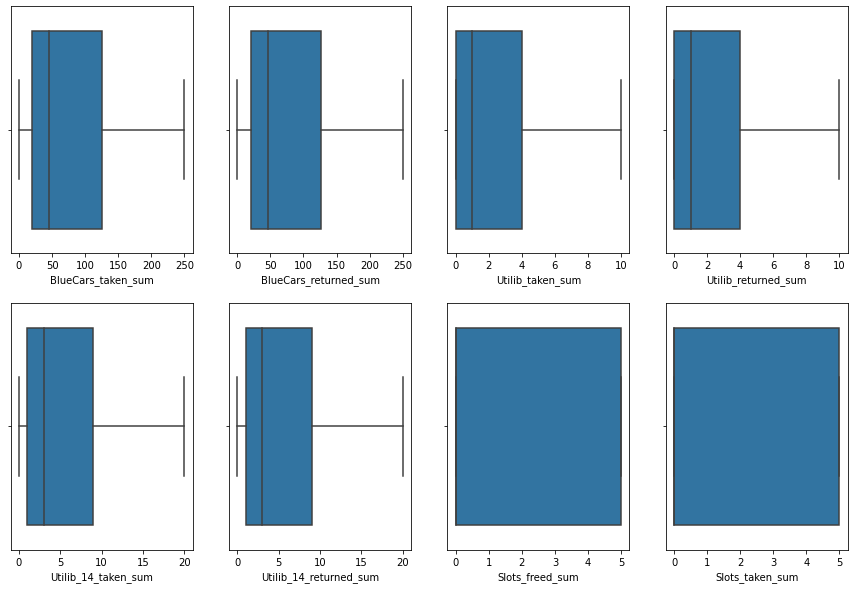

In [ ]:
numeric_cols = ["BlueCars_taken_sum","BlueCars_returned_sum", "Utilib_taken_sum","Utilib_returned_sum","Utilib_14_taken_sum","Utilib_14_returned_sum","Slots_freed_sum","Slots_taken_sum"]
fig,axes = plt.subplots(nrows=2, ncols=4,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),cars_df,numeric_cols):
  sns.boxplot(cars_df[column],ax=ax)

In [ ]:
# Checking for anomalies
# Identifying missing data
cars_df.isna().value_counts()

Postal code  date   n_daily_data_points  dayOfWeek  day_type  BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  Utilib_returned_sum  Utilib_14_taken_sum  Utilib_14_returned_sum  Slots_freed_sum  Slots_taken_sum
False        False  False                False      False     False               False                  False             False                False                False                   False            False              16085
dtype: int64

There are no missing values in the dataset

In [ ]:
cars_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,65.909170,65.894933,2.522474,2.522785,4.929313,4.926329,1.527075,1.524588
std,7647.342000,33.212050,2.008378,54.935594,54.757580,2.805131,2.804131,4.718161,4.711258,2.182022,2.181253
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,250.000000,250.000000,10.000000,10.000000,20.000000,20.000000,5.000000,5.000000


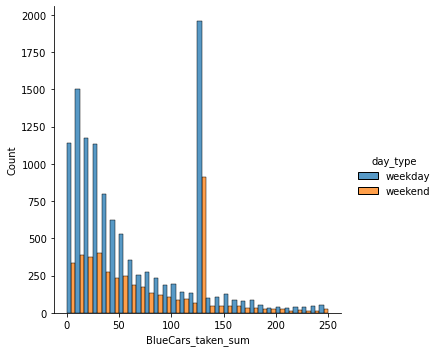

In [ ]:
# Visualization of the numerical variables
sns.displot(cars_df, x="BlueCars_taken_sum", hue="day_type", multiple="dodge")

On average, more blue cars are taken on weekdays than on weekends

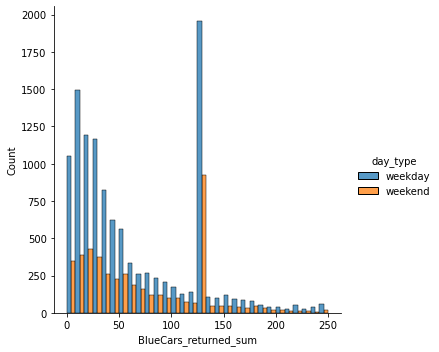

In [ ]:
sns.displot(cars_df, x="BlueCars_returned_sum", hue="day_type", multiple="dodge")

On average, more blue cars are returned on weekdays than on weekends

Testing the Hypothesis

In [ ]:
# Defining the level of significance
alpha = 0.05


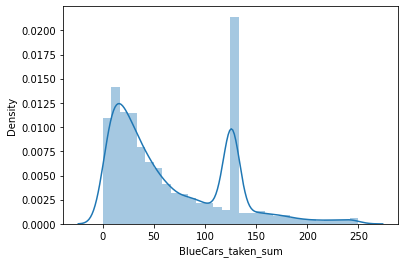

In [ ]:
sns.distplot(cars_df["BlueCars_taken_sum"])

The data appears to follow a somewhat normal distribution and the sample size is >30. 
We shall therefore apply a Z test to test our hypothesis.

In [ ]:
# performing the z test
zscore = (cars_df['BlueCars_taken_sum'].mean())/cars_df['BlueCars_taken_sum'].std()
zscore

1.1997534884792593

In [ ]:
# import norm function from the scipy library
from scipy.stats import norm
pb = 1 - stats.norm.cdf(zscore)
pb

0.11511754640181282

Based on the above test, the p value is at 11% which is much higher than the significance level

***Since the p-value is higher than the level of significance, we fail to reject the null hypothesis and conclude that more bluecars are taken over the weekday than over the weekend. ***